In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df=pd.read_csv('2.csv')
df

,Device Name,Instance Name,Updated time (America/Los_Angeles),Packet Rate
0,csn501,network.interface.packets.in,07-Mar-2016 04:00:00 PM,559.27
1,csn501,network.interface.packets.in,07-Mar-2016 05:00:00 PM,564.02
2,csn501,network.interface.packets.in,07-Mar-2016 06:00:00 PM,580.97
3,csn501,network.interface.packets.in,07-Mar-2016 07:00:00 PM,565.64
4,csn501,network.interface.packets.in,07-Mar-2016 08:00:00 PM,549.09
...,...,...,...,...
329,csn501,network.interface.packets.out,14-Mar-2016 11:00:00 AM,786.27
330,csn501,network.interface.packets.out,14-Mar-2016 12:00:00 PM,767.67
331,csn501,network.interface.packets.out,14-Mar-2016 01:00:00 PM,782.03
332,csn501,network.interface.packets.out,14-Mar-2016 02:00:00 PM,831.24


In [14]:
df.rename(columns={'Updated time (America/Los_Angeles)':'Updated_time'}, inplace=True)
df['Updated_time'] = pd.to_datetime(df['Updated_time'])
df.set_index('Updated_time',inplace = True)
data=df[df['Instance Name'] == 'network.interface.packets.in']


/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_84123/95489933.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



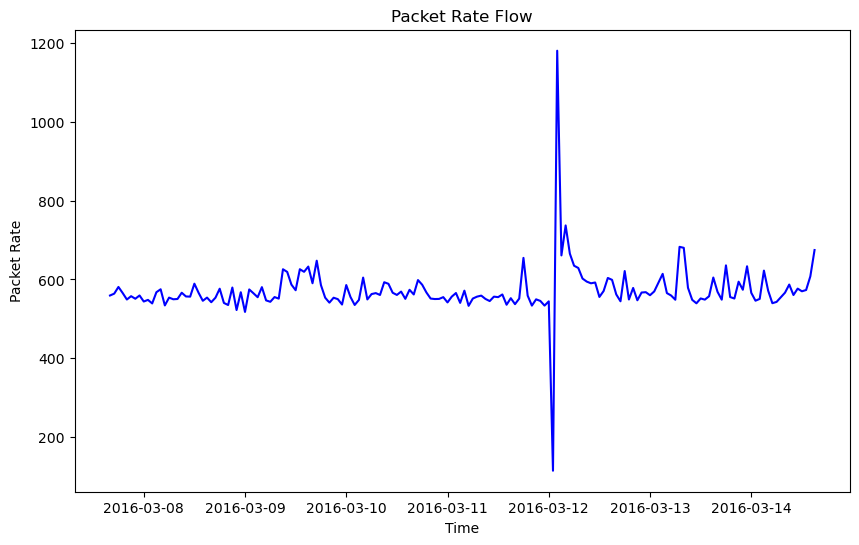

In [15]:
def plot (df:pd.DataFrame, y:str):
    plt.figure(figsize=(10,6))
    # plt.plot(data.index,data['Packet Rate'])
    sns.lineplot(x=df.index,y=y,data=df,color='blue')
    plt.title('Packet Rate Flow')
    plt.xlabel('Time')
    plt.ylabel('Packet Rate')
    # plt.grid(True)
    plt.show()

plot(df=data, y='Packet Rate')

/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_84123/109673885.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



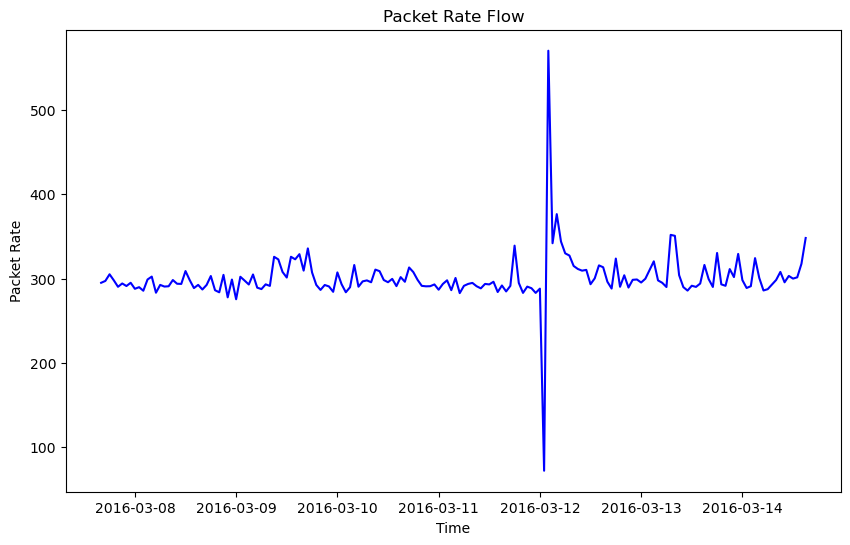

In [16]:
# No need of boxcox as there is no trend

from scipy.stats import boxcox
# Make the target variance stationary
data['P_R_Boxcox'], lam = boxcox(data['Packet Rate'])
# Plot the box-cox passenger data
plot(df=data, y='P_R_Boxcox')

In [17]:
data["P_R_diff"] = data["P_R_Boxcox"].diff()
# We can use dropna() as well as fillna() to counter null values in dataframe
# data.dropna(inplace=True)
data.fillna(0, inplace= True)
data

/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_84123/3548987852.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_84123/3548987852.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Device Name,Instance Name,Packet Rate,P_R_Boxcox,P_R_diff
Updated_time,,,,,
2016-03-07 16:00:00,csn501,network.interface.packets.in,559.27,294.927986,0.000000
2016-03-07 17:00:00,csn501,network.interface.packets.in,564.02,297.137385,2.209399
2016-03-07 18:00:00,csn501,network.interface.packets.in,580.97,305.003268,7.865883
2016-03-07 19:00:00,csn501,network.interface.packets.in,565.64,297.890391,-7.112877
2016-03-07 20:00:00,csn501,network.interface.packets.in,549.09,290.185222,-7.705169
...,...,...,...,...,...
2016-03-14 11:00:00,csn501,network.interface.packets.in,576.76,303.052180,7.542554
2016-03-14 12:00:00,csn501,network.interface.packets.in,569.96,299.897135,-3.155046
2016-03-14 13:00:00,csn501,network.interface.packets.in,573.23,301.414905,1.517770


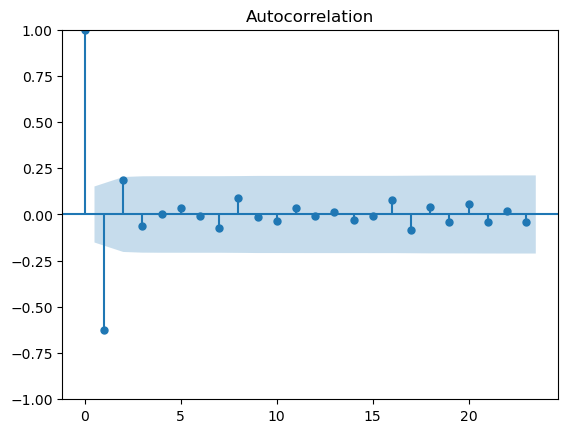

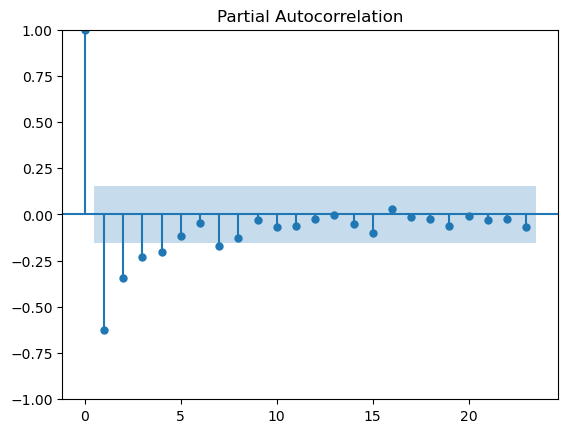

In [18]:
# Plot acf and pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_acf(data['P_R_diff'])
plot_pacf(data['P_R_diff'], method='ywm')
# ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [19]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]
train

,Device Name,Instance Name,Packet Rate,P_R_Boxcox,P_R_diff
Updated_time,,,,,
2016-03-07 16:00:00,csn501,network.interface.packets.in,559.27,294.927986,0.000000
2016-03-07 17:00:00,csn501,network.interface.packets.in,564.02,297.137385,2.209399
2016-03-07 18:00:00,csn501,network.interface.packets.in,580.97,305.003268,7.865883
2016-03-07 19:00:00,csn501,network.interface.packets.in,565.64,297.890391,-7.112877
2016-03-07 20:00:00,csn501,network.interface.packets.in,549.09,290.185222,-7.705169
...,...,...,...,...,...
2016-03-13 01:00:00,csn501,network.interface.packets.in,569.63,299.743907,4.480877
2016-03-13 03:00:00,csn501,network.interface.packets.in,614.26,320.372148,20.628242
2016-03-13 04:00:00,csn501,network.interface.packets.in,565.40,297.778851,-22.593297


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox

# Split train and test


# Build ARIMA model and inverse the boxcox
model = ARIMA(train['P_R_Boxcox'], order=(2, 1, 2)).fit()
boxcox_forecasts = model.forecast(len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)
forecasts

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be giv

134    572.920391
135    565.921540
136    568.960939
137    568.418239
138    568.899503
139    568.934866
140    569.049318
141    569.093016
142    569.131367
143    569.152844
144    569.167851
145    569.177195
146    569.183364
147    569.187315
148    569.189886
149    569.191545
150    569.192620
151    569.193315
152    569.193765
153    569.194056
154    569.194245
155    569.194367
156    569.194446
157    569.194497
158    569.194530
159    569.194551
160    569.194565
161    569.194574
162    569.194580
163    569.194584
164    569.194586
165    569.194588
166    569.194589
Name: predicted_mean, dtype: float64

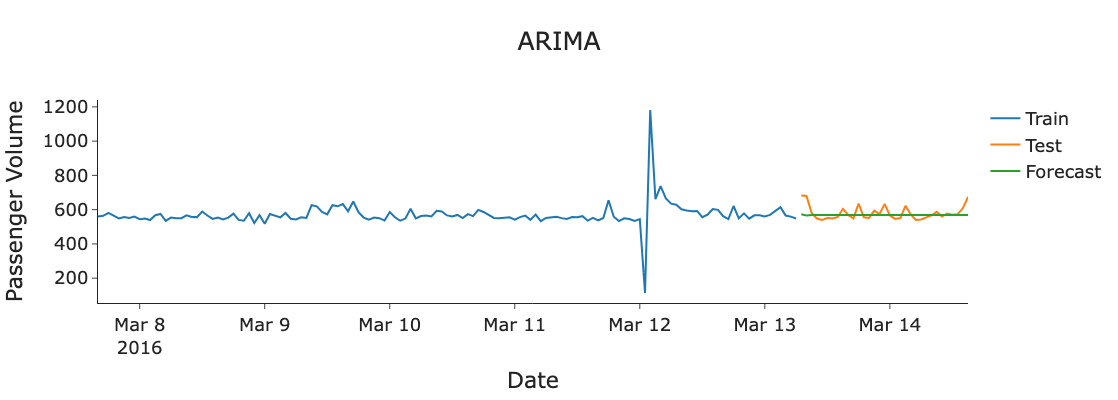

In [21]:
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Packet Rate'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Packet Rate'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()


# Plot the forecasts
plot_forecasts(forecasts, 'ARIMA')

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
observed = test['Packet Rate']
mae = mean_absolute_error(observed, forecasts)
mse = mean_squared_error(observed, forecasts)
mape = mean_absolute_percentage_error(observed, forecasts)
rmse = root_mean_squared_error(observed, forecasts)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RSME: {rmse}')

MAE: 28.428438373739624
MSE: 1739.817423160859
MAPE: 0.04635282210911343
RSME: 41.711118699465004


In [28]:
%store -r models
models

,Model,MAE,MAPE,MSE,RMSE
0,SARIMA,43.226426,0.073251,3196.550691,56.538046


In [29]:
models.loc[1] = ['ARIMA','28.428438373739624','0.04635282210911343','1739.817423160859','41.711118699465004'] 

In [30]:
models

,Model,MAE,MAPE,MSE,RMSE
0,SARIMA,43.226426,0.073251,3196.550691,56.538046
1,ARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004


In [32]:
%store models

Stored 'models' (DataFrame)
